
# 1. Reading Data  & Importing Library

In this section, raw data will be read, overviewed and checked if cleaning is required.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

C:\Users\saeed\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df=pd.read_csv("Customers.csv")
df.shape

(200, 5)

In [3]:
# show first 5 rows 
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#change Gender Male/Female to 0/1
df['Gender'].replace('Female', 0,inplace=True)
df['Gender'].replace('Male', 1,inplace=True)
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
# get info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [6]:
#print statistical describe of dataframe
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [7]:
# check null value 
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E05FD87860>]],
      dtype=object)

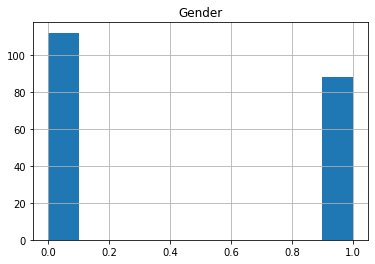

In [8]:
df.hist(column='Gender')

C:\Users\saeed\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


TypeError: unsupported format string passed to tuple.__format__

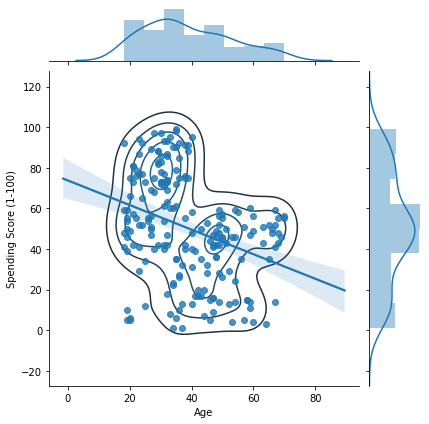

In [9]:
# calculating Pearson's correlation
import seaborn as sns
from scipy.stats import pearsonr

corr= pearsonr(df['Age'], df['Spending Score (1-100)'])
joinplot = (sns.jointplot('Age', 'Spending Score (1-100)', data=df, kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()


# 2. Clustering

  
* K-Means
* Density-Based Spatial Clustering of Applications with Noise (DBSCAN)


## 2.1. K-Means


In [10]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Hint : For clustering only numeric columns are used.

In [11]:
X = df.values[:,2:]
clus_dataset = StandardScaler().fit_transform(X)
clus_dataset

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [12]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


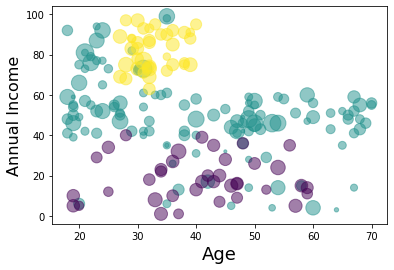

In [13]:
area = np.pi * ( X[:, ])**1  
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual Income', fontsize=16)
plt.show()

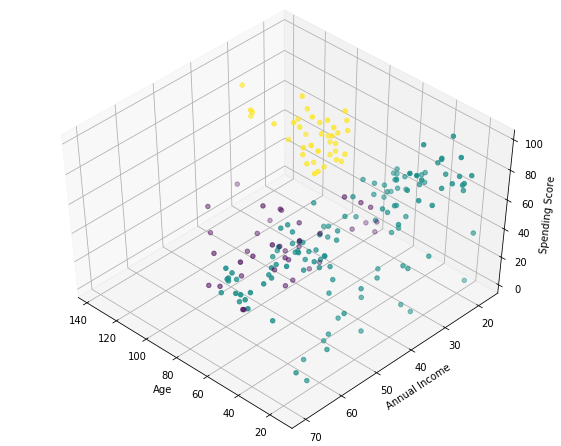

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

ax.scatter(X[:, 1], X[:, 0], X[:, 2], c= labels.astype(np.float))


In [15]:
# use silhouette_score method  and elbow method

from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8]
clusters_inertia = [] 
s_scores = [] 
for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X)
    clusters_inertia.append(KM_est.inertia_)
    silhouette_avg = silhouette_score(X, KM_est.labels_)
    s_scores.append(silhouette_avg)
print("silhouette:",s_scores)
print("Elbow:",clusters_inertia)

silhouette: [0.293166070535953, 0.3839349967742105, 0.40546302077733304, 0.44428597560893024, 0.4523443947724053, 0.44125523526699084, 0.42977587111050725]
Elbow: [212840.16982097185, 143342.751571706, 104366.15145556198, 75350.77917248776, 58300.44332159069, 51082.54296792137, 44312.46881207721]


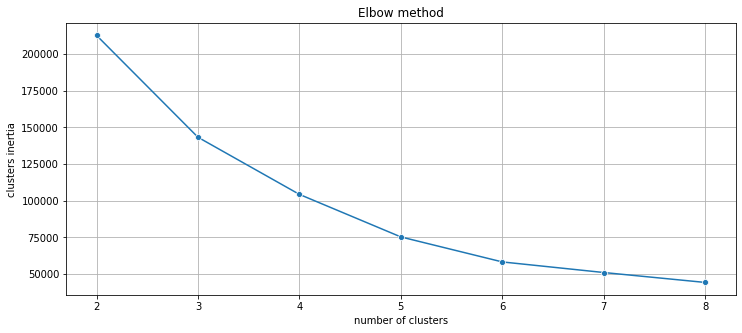

In [16]:
# visulize elbow method 
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
plt.grid()
plt.show()

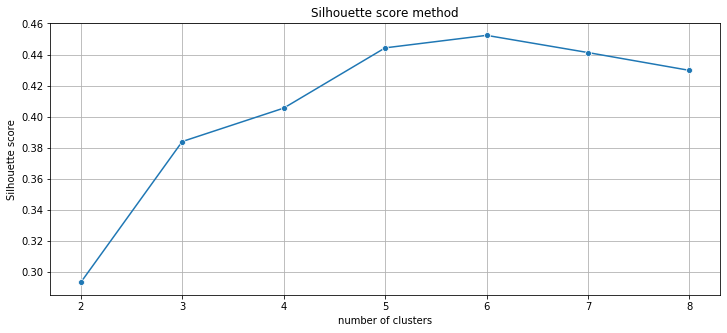

In [17]:
# visulize silhouette_score method
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
plt.grid()
plt.show()

In [18]:
k_meansnew = KMeans(init = "k-means++", n_clusters = 6, n_init = 12).fit(X)
KM_clustered = X.copy()
labels = k_meansnew.labels_
df['Cluster'] = k_meansnew.labels_
print(labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 0 2 0 5 4 2 0 5 5 5 0 5 5 0 0 0 0 0 5 0 0 5 0 0 0 5 0 0 5 5 0 0 0 0
 0 5 0 5 5 0 0 5 0 0 5 0 0 5 5 0 0 5 0 5 5 5 0 5 0 5 5 0 0 5 0 5 0 0 0 0 0
 5 5 5 5 5 0 0 0 0 5 5 5 1 5 1 3 1 3 1 3 1 5 1 3 1 3 1 3 1 3 1 5 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [19]:
KM_clust_sizes = df.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,45
1,39
2,22
3,35
4,21
5,38


In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


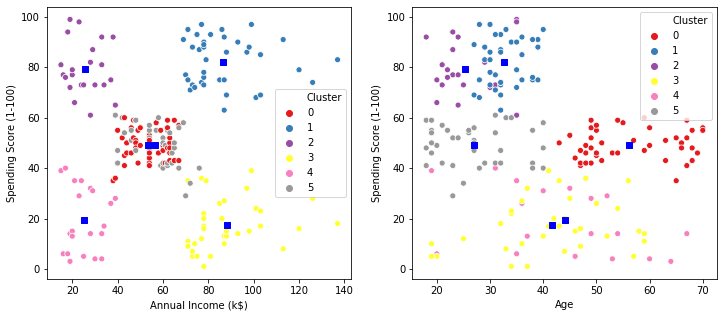

In [22]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=df, hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=df, hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(k_meansnew.cluster_centers_[:,1],k_meansnew.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(k_meansnew.cluster_centers_[:,0],k_meansnew.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()


# 2.2 DBSCAN



In [25]:
from itertools import product

eps_values = np.arange(8,13,0.25)
min_samples = np.arange(3,10)
DBSCAN_params = list(product(eps_values, min_samples))

In [26]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))
print(sil_score)

[0.03523183319491217, -0.02147416705080717, 0.01311730537912744, -0.037856968288658935, -0.12691137408529196, -0.16320109865956545, -0.22952472168827678, 0.11794025651864473, 0.030919459877798986, 0.0026120067709137795, -0.010657568508570952, -0.07843325081254296, -0.15076821608044708, -0.2193812749149287, 0.10218339749091918, 0.03525515433758843, 0.012783230221530086, -0.0026411846829178433, -0.05764928433699911, -0.11442367185842997, -0.20829335215639208, 0.10794176025451761, 0.08512060045848535, 0.07687636405239015, -0.005314265607171622, 0.009673519062197957, -0.08983717779622592, -0.19084530198917327, 0.11395369330062792, 0.09200586725651252, 0.07687636405239015, 0.01373675522866092, 0.023655146382314446, -0.06361003273116211, -0.1530431679636375, 0.16483355817918394, 0.11846615029723534, 0.10554053872016375, 0.0372788643854904, 0.015950137387842282, -0.023239937942889494, -0.08462004420998577, 0.15499294818931003, 0.07254893597582747, 0.018201407008572045, 0.06567255669809864, 0.

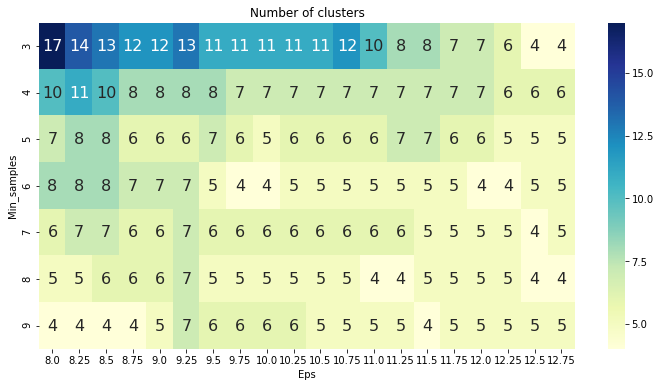

In [27]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

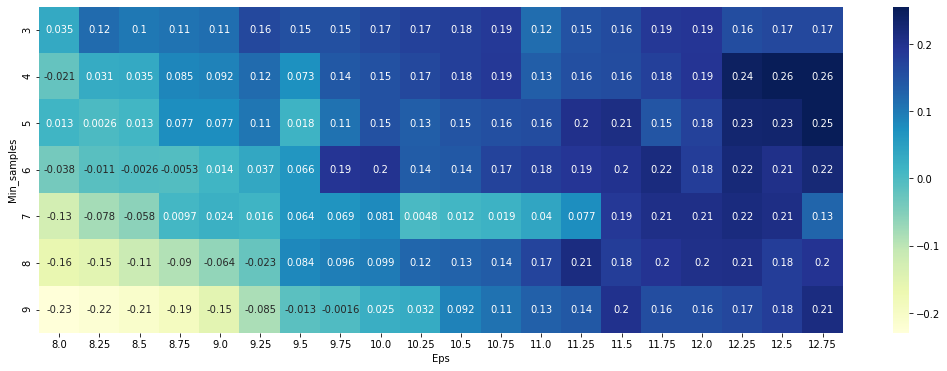

In [28]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [29]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)

DBSCAN_clustered = X.copy()
df['Clusterdb'] = DBS_clustering.labels_ 

In [30]:
DBSCAN_clust_sizes = df.groupby('Clusterdb').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Clusterdb,
-1,18
0,112
1,8
2,34
3,24
4,4


In [31]:
outliers = df[df['Clusterdb']==-1]
outliers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Clusterdb
2,3,0,20,16,6,4,-1
6,7,0,35,18,6,4,-1
7,8,0,23,18,94,2,-1
10,11,1,67,19,14,4,-1
11,12,0,35,19,99,2,-1


In [32]:
inliers=df[df['Clusterdb']!=-1]
inliers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Clusterdb
0,1,1,19,15,39,4,0
1,2,1,21,15,81,2,0
3,4,0,23,16,77,2,0
4,5,0,31,17,40,4,0
5,6,0,22,17,76,2,0


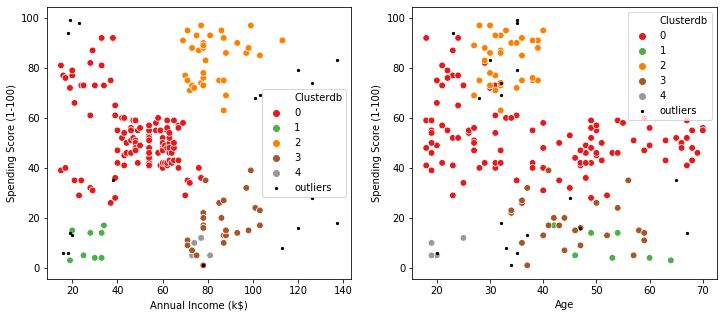

In [33]:
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=df[df['Clusterdb']!=-1] ,hue='Clusterdb', ax=axes[0], palette='Set1', legend='full', s=45)
sns.scatterplot('Age', 'Spending Score (1-100)',data=df[df['Clusterdb']!=-1], hue='Clusterdb', palette='Set1', ax=axes[1], legend='full', s=45)
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

# Maktabkhone Clustering Project
- Author: Saeed Bagheri
- Github:  https://github.com/Saeedb7203